<a href="https://colab.research.google.com/github/ashishshetty447/DataAnalytics/blob/main/Hand_Written_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Prediction - Classification Analysis**

# Objective:
Handwritten Digit Prediction - Classification Analysis is to develop a highly accurate machine learning model that can classify handwritten digits (0-9) with precision and recall. The model should generalize well to new data, avoid overfitting, and be deployable in real-world applications, such as optical character recognition systems.

**Data Source:**:
sklearn.datasets


# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Import Data**

In [2]:
from sklearn.datasets import load_digits

In [3]:
df=load_digits()

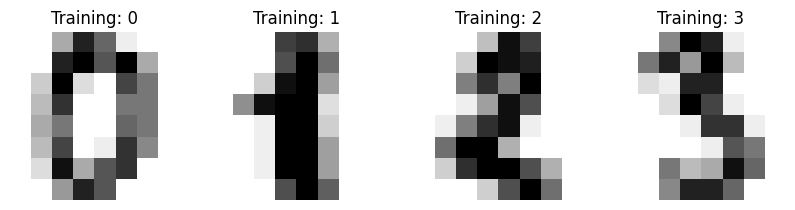

In [4]:
_, axes = plt.subplots(nrows = 1,ncols =4, figsize = (10,3))
for ax, image, label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Training: %i" % label)

# **Data Preprocessing**

In [5]:
df.images.shape

(1797, 8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[0].shape

(8, 8)

In [9]:
len(df.images)

1797

In [10]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [11]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
data[0].shape

(64,)

# **Scaling Image Data**

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data =data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target,test_size = 0.3)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# **Predict Test Data**

In [25]:
y_pred = rf.predict(X_test)

In [26]:
y_pred

array([1, 0, 8, 3, 1, 1, 9, 1, 4, 4, 0, 6, 6, 4, 0, 0, 8, 4, 7, 8, 7, 6,
       2, 4, 1, 1, 9, 1, 7, 6, 2, 3, 1, 2, 9, 4, 2, 4, 2, 7, 7, 9, 6, 4,
       5, 0, 9, 4, 2, 9, 9, 1, 0, 4, 8, 9, 6, 2, 6, 0, 1, 7, 2, 6, 1, 3,
       5, 1, 8, 6, 6, 9, 5, 8, 7, 3, 8, 9, 7, 1, 6, 4, 8, 3, 2, 7, 9, 6,
       1, 5, 4, 3, 5, 3, 9, 7, 2, 4, 2, 2, 3, 1, 7, 3, 7, 7, 6, 6, 5, 7,
       8, 1, 1, 7, 8, 6, 4, 4, 2, 9, 1, 8, 7, 4, 6, 8, 5, 6, 3, 1, 8, 2,
       0, 6, 0, 5, 9, 5, 3, 9, 3, 0, 7, 5, 8, 1, 4, 6, 6, 7, 4, 7, 3, 5,
       6, 0, 1, 3, 5, 4, 8, 8, 8, 8, 7, 0, 6, 5, 9, 3, 2, 1, 6, 7, 0, 1,
       6, 5, 9, 9, 9, 0, 7, 4, 4, 1, 7, 8, 9, 4, 4, 3, 6, 6, 7, 5, 4, 9,
       5, 9, 0, 9, 5, 8, 8, 4, 8, 9, 4, 4, 2, 4, 9, 6, 3, 6, 5, 8, 2, 2,
       1, 5, 7, 8, 9, 2, 8, 4, 5, 5, 5, 5, 0, 9, 2, 6, 3, 2, 3, 5, 6, 5,
       8, 3, 1, 0, 2, 2, 1, 6, 6, 9, 7, 2, 2, 2, 4, 1, 5, 1, 4, 2, 5, 8,
       1, 9, 4, 0, 3, 8, 2, 0, 2, 8, 3, 9, 4, 7, 3, 5, 7, 0, 2, 4, 4, 3,
       1, 7, 4, 1, 9, 1, 3, 5, 2, 7, 2, 2, 4, 8, 0,

# **Model Accuracy**

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test,y_pred)

array([[38,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  1, 50,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  2,  0, 60]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        53
           3       0.98      0.98      0.98        55
           4       0.96      1.00      0.98        54
           5       0.95      1.00      0.97        53
           6       1.00      0.98      0.99        59
           7       0.95      1.00      0.97        55
           8       1.00      0.94      0.97        53
           9       1.00      0.94      0.97        64

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# **Explaination**


1.   Firstly we import three libraries as follows:
panadas,numpy,matplotib.pyplot

2.   Secondly imported the data from datasource sklearn.datasets and load it.

3.  After that performs Image Preprocessing.

4.  Scale the imported image data.

5.  From the imported library import classifiers.

6.  Predict the test data.

7.  Check the model Accuracy by import confusion matrix and classification report.


